# Pip Installs I Made

In [1]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas
#!pip install seaborn
#!pip install scikit-learn
#!pip install wordcloud
#!pip install transformers
#!pip install textblob
#!pip install spacy
#!pip install imblearn
#!python -m spacy download en_core_web_sm
#!pip install numpy==1.26.4
#!pip install gensim
#!pip install tensorflow
# print numpy version

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

import pickle 
#import mglearn
import time


from nltk.tokenize import TweetTokenizer # doesn't split at apostrophes
import nltk
from nltk import Text
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import word_tokenize  
from nltk.tokenize import sent_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

nltk.download('punkt_tab')
nltk.download('stopwords')

# prints numpy version
print(np.__version__)

[nltk_data] Downloading package stopwords to /home/pedro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pedro/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/pedro/nltk_data...


1.26.4


[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/pedro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Load dataset

In [2]:
data = pd.read_csv('datasets/train.txt', sep='\t', header=None, names=['Title', 'Origin', 'Genre', 'Director', 'Plot'])

print(data.head())

print(f"{data.isnull().sum()}, {len(data.isnull())}")

print("Genre value counts")
print(data['Genre'].value_counts())


                       Title     Origin    Genre       Director  \
0               Ela Cheppanu     Telugu  romance         Ramana   
1  A Nightmare on Elm Street   American   horror   Samuel Bayer   
2            American Gothic   American   horror     John Hough   
3                       Gang  Bollywood    crime    Mazhar Khan   
4         Intimate Relations    British    drama  Charles Frank   

                                                Plot  
0  Sekhar (Tarun) is a graduate from IIM and work...  
1  Kris Fowles (Katie Cassidy) goes to the Spring...  
2  Cynthia is traumatized by the death of her bab...  
3  Four friends, Gangu (Jackie Shroff), Abdul (Na...  
4  Crisis in a middle-class family when the son f...  
Title       0
Origin      0
Genre       0
Director    0
Plot        0
dtype: int64, 8041
Genre value counts
Genre
drama        1676
comedy       1193
horror       1108
action       1059
romance       886
western       829
crime         541
animation     535
sci-fi   

# Stop Words

In [3]:
stop_words = ["the", "to", "of", "a", 'and', 'is', 'his', 'in', 'he', 
            'that', 'her', "with", "by", "for", "him", "the", "as", "who",
            "on", "she", "but", "from", "has", "they", "an", "at", "their", "are",
            "into", "he", "out", "it", "up", "be", "was", "when", "not", "them", "which",
            "then", "after", "about", "where", "one", "have", "When", "After", "tells", "him.",
            "back", "She", "will", "while", "all", "two", "In", "had", "been", "They",
            "get", "only", "also", "before", "off", "being", "As", "goes", "takes",
            "this", "other", "take", "tries", "A", "her.", "go", "gets", "can", "man", "so",
            "over", "through", "down", "help", "new", "him,", "now", "comes", "next", "himself",
            "later", "however", "away", "there", "during", "both", "first", "again", "no", "way", "own",
            "some", "another", "more", "becomes", "make", "does", "what", "begins", "meanwhile", "just",
            "asks", "if", "because", "soon", "having", "its", "eventually", "come", "still", "between", "father",
            "house", "finds" # TODO check if father should be here or not
            ]

# TODO keep adding from list below 
# also, add words from the top 10 most frequent words in each genre
'''
SHOULD WE CONSIDER THESE:
('finds', 3769), ('find', 3721), ('help', 2395), ('film', 2240)], ('leave', 2411), ('leaves', 2400), ('decides', 2220)
('meets', 1932), ('arrives', 1918), ('room', 1887), ('girl', 1877), ('return', 1874), ('group', 1859), ('sees', 1857), 
('dead', 1842), ('old', 1837), ('story', 1832), ('see', 1832), ('brother', 1806), ('each', 1791), ('three', 1775), 
('body', 1760), ('falls', 1754), ('finally', 1738), ('fight', 1738), ('reveals', 1690), ('school', 1684), 
('gang', 1662), ('wants', 1655), ('head', 1618), ('local', 1612), ('attempts', 1593), 
('gives', 1588), ('against', 1583), ('work', 1581), ('same', 1565), ('discovers', 1565), ('together', 1548)]
]'''

"\nSHOULD WE CONSIDER THESE:\n('finds', 3769), ('find', 3721), ('help', 2395), ('film', 2240)], ('leave', 2411), ('leaves', 2400), ('decides', 2220)\n('meets', 1932), ('arrives', 1918), ('room', 1887), ('girl', 1877), ('return', 1874), ('group', 1859), ('sees', 1857), \n('dead', 1842), ('old', 1837), ('story', 1832), ('see', 1832), ('brother', 1806), ('each', 1791), ('three', 1775), \n('body', 1760), ('falls', 1754), ('finally', 1738), ('fight', 1738), ('reveals', 1690), ('school', 1684), \n('gang', 1662), ('wants', 1655), ('head', 1618), ('local', 1612), ('attempts', 1593), \n('gives', 1588), ('against', 1583), ('work', 1581), ('same', 1565), ('discovers', 1565), ('together', 1548)]\n]"

# Data Preprocessing

In [4]:
def clean_text(text):
    text = text.lower()
    text = re.sub('[%s]' % re.escape(string.punctuation + string.digits), '', text)
    text = re.sub('\s+', ' ', text).strip()
    return text

def clean_text2(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r"[^a-zA-Z]", " ", text)
    text = text.strip(' ')
    return text

def tokenize_and_remove_stopwords(text):
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered)

def remove_stopwords(text):
    tokens = text.split()
    filtered = [word for word in tokens if word not in stop_words]
    return filtered

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized)

# cleaning, tokenizing and removing stopwords TODO does it make sense to tokenize?
# even if we tokenize, does it make sense to tokenize like I'm doing?
data['Clean_Plot'] = data['Plot'].apply(clean_text2)

data['Clean_Plot'] = data['Clean_Plot'].apply(tokenize_and_remove_stopwords)

# lemmatization -- TODO does it make sense to lemmatize? I think not
#data['Clean_Plot'] = data['Clean_Plot'].apply(lemmatize_text)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:19: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_183129/637987574.py:4: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text).strip()
/tmp/ipykernel_183129/637987574.py:19: SyntaxWarning: invalid escape sequence '\s'
  text = re.sub('\s+', ' ', text)


# Encoding and split

In [6]:
X = data['Clean_Plot'].values
y = data['Genre'].values 
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization

In [7]:
count_vectorizer = CountVectorizer(max_features=5000, stop_words=stop_words, ngram_range=(1, 3))
X_train_counts = count_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)

# GloVe for feature extraction

## Import GloVe

In [ ]:
import numpy as np
glove_file = 'glove.6B/glove.6B.100d.txt'

# Load the GloVe model
def load_glove_embeddings(glove_file):
    embeddings_index = {}
    with open(glove_file, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            embedding_vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = embedding_vector
    return embeddings_index

# Load embeddings
embeddings_index = load_glove_embeddings(glove_file)
print(f"Loaded {len(embeddings_index)} word vectors.")

In [ ]:
import numpy as np

# Assuming X contains the movie plots
def get_average_embedding(text, embeddings_index, embedding_dim=100):
    words = text.split()  # Basic tokenization (you can use a more sophisticated tokenizer)
    embedding_matrix = []
    
    for word in words:
        if word in embeddings_index:  # Check if the word has a GloVe embedding
            embedding_matrix.append(embeddings_index[word])
        else:
            embedding_matrix.append(np.zeros(embedding_dim))  # Use a zero vector for unknown words
    
    if len(embedding_matrix) > 0:
        # Average the embeddings to get a single vector for the plot
        return np.mean(embedding_matrix, axis=0)
    else:
        return np.zeros(embedding_dim)  # Return a zero vector if no embeddings were found

# Example usage:
X = data['Clean_Plot'].values  # Movie plots
embedding_dim = 100  # Adjust this based on the GloVe file used
X_embeddings = np.array([get_average_embedding(plot, embeddings_index, embedding_dim) for plot in X])
print(X_embeddings.shape)

## Give it to SVC

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Labels (e.g., genre labels)
y = data['Genre'].values

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)

# Train an SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


## Give it to MNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

# Since Naive Bayes expects non-negative values, we scale the embeddings to [0, 1]
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


# Implementations

In [ ]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=7000, min_df=20, stop_words=stop_words, ngram_range=(1, 3))
X = tfidf.fit_transform(data['Clean_Plot']).toarray()

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Genre'])
chi2_selector = SelectKBest(chi2, k=500)
X_kbest = chi2_selector.fit_transform(X, y)
# we need to apply some sampling technique because the class imbalance is affecting the results
ros = RandomOverSampler(random_state=42)

smote = SMOTE(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_kbest, y, test_size=0.2, random_state=42)
#X_train, y_train = smote.fit_resample(X_train, y_train)
#X_train, y_train = ros.fit_resample(X_train, y_train)

nb_classifier = MultinomialNB(alpha=0.1)
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Grid Search to find the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('chi2', SelectKBest(chi2)),
    ('nb', MultinomialNB())
])

# Define the parameter grid for grid search
param_grid = {
    'tfidf__max_features': [3000, 5000, 7000],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)],  # Unigrams, bigrams, and trigrams
    'tfidf__min_df': [10, 20, 30],
    'chi2__k': [500, 1000, 2000, 3000, 5000, 7000],
    'nb__alpha': [0.1, 0.5, 1.0]  # Smoothing parameter
}

X_train, X_test, y_train, y_test = train_test_split(data['Clean_Plot'], data['Genre'], test_size=0.2, random_state=42)

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)
## 7k features, 20 min_df, 1-3 ngram, 500 chi2, 0.1 alpha


# Kaggle Word2Vec + Random Forest

In [8]:
import gensim
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

encoder = LabelEncoder()
y = encoder.fit_transform(data['Clean_Plot'])
X_train,X_val,y_train,y_val = train_test_split(data,y,test_size=0.2,random_state=1)

In [9]:
def train_word2vec_model(df):
    plot = []
    for doc in data['Clean_Plot']:
        raw_sent = sent_tokenize(doc)
        for sent in raw_sent:
            plot.append(simple_preprocess(sent))

    model = gensim.models.Word2Vec(
        window=10,
        min_count=2
    )
    model.build_vocab(plot)
    model.train(plot, total_examples=model.corpus_count, epochs=model.epochs)

    return model
w2v_model = train_word2vec_model(X_train)

In [ ]:
from tqdm import tqdm
def document_vector(doc, model):
    # remove out-of-vocabulary words
    doc = [word for word in doc.split() if word in model.wv.index_to_key]
    if not doc:
        # If no words are in the vocabulary, return zeros
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)

X_train_embd = []
for doc in tqdm(X_train['Clean_Plot'].values):
    X_train_embd.append(document_vector(doc, w2v_model))
X_train_embd = np.array(X_train_embd)

X_val_embd = []
for doc in tqdm(X_val['Clean_Plot'].values):
    X_val_embd.append(document_vector(doc, w2v_model))
X_val_embd = np.array(X_val_embd)

In [ ]:
X_train_embd.shape

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_embd,y_train)
y_pred = rf.predict(X_val_embd)
accuracy_score(y_val,y_pred)

# LSTM

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, BatchNormalization
from keras.callbacks import EarlyStopping

# Sentiment Analysis (Experiment)

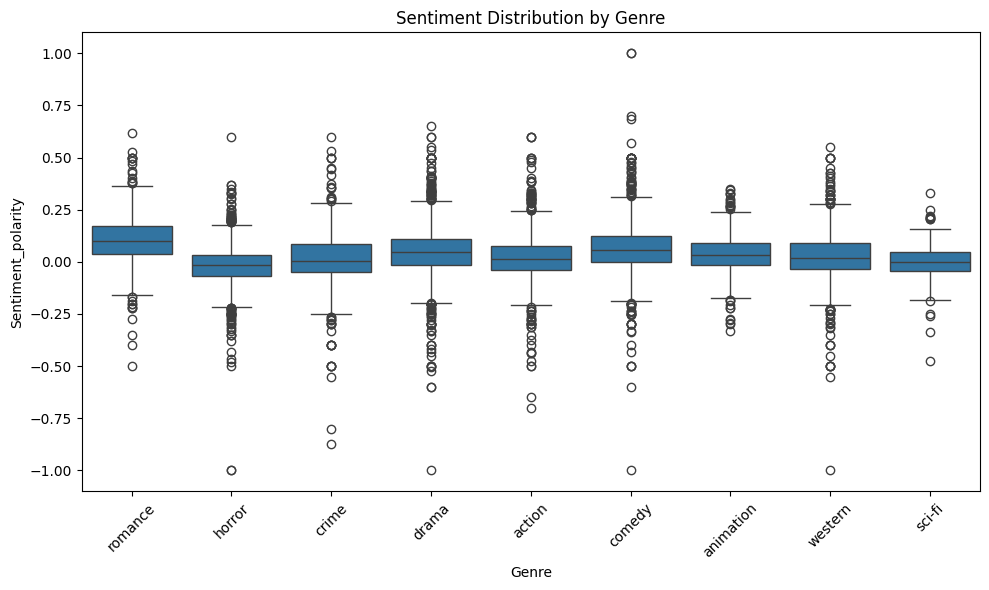

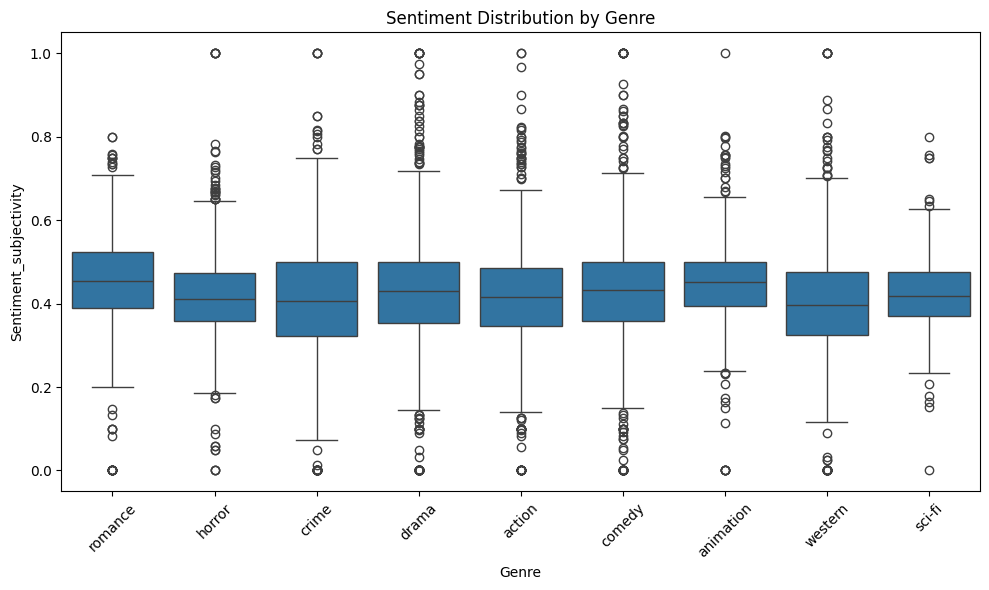

In [5]:
from textblob import TextBlob
from scipy.sparse import hstack
from sklearn.metrics import classification_report, confusion_matrix

def get_sentiment_polarity(text):
    return TextBlob(text).sentiment.polarity
def get_sentiment_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

data['Sentiment_polarity'] = data['Plot'].apply(get_sentiment_polarity)
data['Sentiment_subjectivity'] = data['Plot'].apply(get_sentiment_subjectivity)

def plot_sentiment_by_genre(modifier):
    # Set the size of the plot
    plt.figure(figsize=(10, 6))
    
    # Create a boxplot of sentiment by genre
    sns.boxplot(x='Genre', y=modifier, data=data)
    
    # Customize the plot
    plt.title('Sentiment Distribution by Genre')
    plt.xlabel('Genre')
    plt.ylabel(modifier)
    plt.xticks(rotation=45)  # Rotate x-axis labels if necessary for readability
    
    # Show the plot
    plt.tight_layout()
    plt.show()

plot_sentiment_by_genre('Sentiment_polarity')
plot_sentiment_by_genre('Sentiment_subjectivity')

In [6]:
tfidf = TfidfVectorizer()
vectorized_plot =  tfidf.fit_transform(data['Clean_Plot'])

X_sentiment = data[['Sentiment_polarity']].values
X_combined = hstack([vectorized_plot, X_sentiment])

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Genre'])


X_sentiment = data[['Sentiment_polarity']].values
X_combined = hstack([vectorized_plot, X_sentiment])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)

Accuracy: 0.6426351771286514
Classification Report:
               precision    recall  f1-score   support

      action       0.58      0.64      0.61       202
   animation       0.92      0.60      0.73       115
      comedy       0.55      0.53      0.54       223
       crime       0.78      0.35      0.48       108
       drama       0.47      0.73      0.57       319
      horror       0.82      0.80      0.81       223
     romance       0.64      0.47      0.54       186
      sci-fi       0.62      0.26      0.36        39
     western       0.95      0.89      0.91       194

    accuracy                           0.64      1609
   macro avg       0.70      0.58      0.62      1609
weighted avg       0.68      0.64      0.64      1609



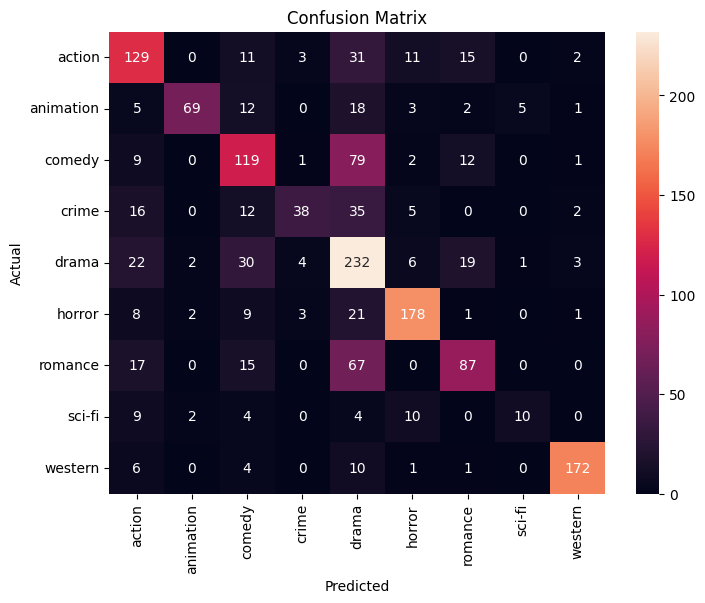

In [7]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [8]:
vectorizer = CountVectorizer(analyzer='word')
vectorized_plot = vectorizer.fit_transform(data['Clean_Plot'])

# Combine 'Sentiment' (a numerical column) with the sparse matrix from CountVectorizer
X_sentiment = data[['Sentiment_polarity']].values  # Convert to 2D array
X_combined = hstack([vectorized_plot, X_sentiment])  # Combine sparse matrix with 2D array

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Genre'])

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)

Accuracy: 0.5736482287134866
Classification Report:
               precision    recall  f1-score   support

      action       0.53      0.54      0.54       202
   animation       0.66      0.63      0.65       115
      comedy       0.42      0.51      0.46       223
       crime       0.46      0.42      0.44       108
       drama       0.49      0.52      0.50       319
      horror       0.73      0.71      0.72       223
     romance       0.55      0.44      0.49       186
      sci-fi       0.45      0.49      0.47        39
     western       0.86      0.81      0.84       194

    accuracy                           0.57      1609
   macro avg       0.57      0.56      0.57      1609
weighted avg       0.58      0.57      0.58      1609



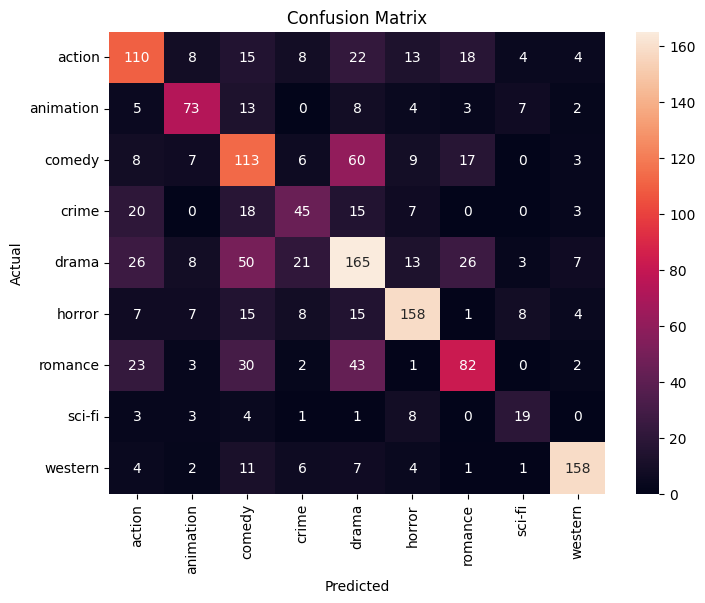

In [9]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ELMO (Dont have enough RAM)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)

elmo = hub.load("https://tfhub.dev/google/elmo/3")

# Function to get embeddings
def elmo_embedding(texts):
    inputs = tf.constant(texts)
    embedding_tensor = elmo.signatures['default'](inputs)['word_emb']
    return embedding_tensor

example = ["dog"]
print(elmo_embedding(example))

In [ ]:
embedded_plot = np.array(elmo_embedding(data['Clean_Plot']))

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(data['Genre'])

X_train, X_test, y_train, y_test = train_test_split(embedded_plot, y, test_size=0.2, random_state=42)

svc_classifier = SVC(kernel='linear')
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()